In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Which leading causes of death are most prevalent among different demographics? For example, are there specific causes of death that are more common among men vs. women, or among certain racial/ethnic groups?



In [107]:
# Load the dataset
df = pd.read_csv('New_York_City_Leading_Causes_of_Death.csv')



In [108]:
df.head(10)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,Chronic Lower Respiratory Diseases (J40-J47),M,White Non-Hispanic,444,33.3,27.8
1,2008,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3361,250.4,214.3
2,2010,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,150,13.1,17.6
3,2014,Malignant Neoplasms (Cancer: C00-C97),M,Hispanic,1146,96,143.5
4,2014,Certain Conditions originating in the Perinata...,M,Not Stated/Unknown,25,.,.
5,2014,Influenza (Flu) and Pneumonia (J09-J18),F,Asian and Pacific Islander,80,12.8,14.1
6,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Asian and Pacific Islander,42,6.7,6.9
7,2013,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,159,18.5,19.1
8,2011,Essential Hypertension and Renal Diseases (I10...,M,White Non-Hispanic,142,10.6,8.8
9,2013,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,149,12.6,15.7


In [109]:
# Check for missing values
print('Missing Values:', df.isnull().sum())

Missing Values: Year                       0
Leading Cause              0
Sex                        0
Race Ethnicity             0
Deaths                     0
Death Rate                 0
Age Adjusted Death Rate    0
dtype: int64


In [110]:
df.shape

(1094, 7)

In [111]:
# Group the data by sex and count the occurrences of each leading cause of death
male_causes = df[df['Sex'] == 'M']['Leading Cause'].value_counts()
female_causes = df[df['Sex'] == 'F']['Leading Cause'].value_counts()

# Group the data by race/ethnicity and count the occurrences of each leading cause of death
white_causes = df[df['Race Ethnicity'] == 'White Non-Hispanic']['Leading Cause'].value_counts()
hispanic_causes = df[df['Race Ethnicity'] == 'Hispanic']['Leading Cause'].value_counts()
asian_causes = df[df['Race Ethnicity'] == 'Asian and Pacific Islander']['Leading Cause'].value_counts()
unknown_causes = df[df['Race Ethnicity'] == 'Not Stated/Unknown']['Leading Cause'].value_counts()

In [112]:
male_causes

All Other Causes                                                                                                                     48
Diseases of Heart (I00-I09, I11, I13, I20-I51)                                                                                       48
Malignant Neoplasms (Cancer: C00-C97)                                                                                                48
Influenza (Flu) and Pneumonia (J09-J18)                                                                                              48
Diabetes Mellitus (E10-E14)                                                                                                          45
Accidents Except Drug Posioning (V01-X39, X43, X45-X59, Y85-Y86)                                                                     45
Chronic Lower Respiratory Diseases (J40-J47)                                                                                         43
Cerebrovascular Disease (Stroke: I60-I69)       

In [113]:
df.head(10)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,Chronic Lower Respiratory Diseases (J40-J47),M,White Non-Hispanic,444,33.3,27.8
1,2008,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3361,250.4,214.3
2,2010,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,150,13.1,17.6
3,2014,Malignant Neoplasms (Cancer: C00-C97),M,Hispanic,1146,96,143.5
4,2014,Certain Conditions originating in the Perinata...,M,Not Stated/Unknown,25,.,.
5,2014,Influenza (Flu) and Pneumonia (J09-J18),F,Asian and Pacific Islander,80,12.8,14.1
6,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Asian and Pacific Islander,42,6.7,6.9
7,2013,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,159,18.5,19.1
8,2011,Essential Hypertension and Renal Diseases (I10...,M,White Non-Hispanic,142,10.6,8.8
9,2013,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,149,12.6,15.7


In [114]:
df.shape

(1094, 7)

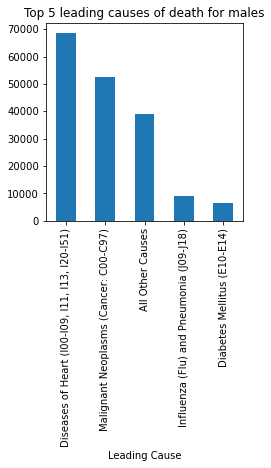

In [115]:


# Convert the 'Deaths' column to a numeric datatype
df['Deaths'] = pd.to_numeric(df['Deaths'], errors='coerce')

# Create a dictionary to store the causes of death for each demographic
male_causes = df[df['Sex'] == 'M'].groupby('Leading Cause')['Deaths'].sum().nlargest(5)
female_causes = df[df['Sex'] == 'F'].groupby('Leading Cause')['Deaths'].sum().nlargest(5)
white_causes = df[df['Race Ethnicity'] == 'White Non-Hispanic'].groupby('Leading Cause')['Deaths'].sum().nlargest(5)
hispanic_causes = df[df['Race Ethnicity'] == 'Hispanic'].groupby('Leading Cause')['Deaths'].sum().nlargest(5)
asian_causes = df[df['Race Ethnicity'] == 'Asian and Pacific Islander'].groupby('Leading Cause')['Deaths'].sum().nlargest(5)
unknown_causes = df[df['Race Ethnicity'] == 'Not Stated/Unknown'].groupby('Leading Cause')['Deaths'].sum().nlargest(5)

# Create a bar chart for each demographic
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
male_causes.plot(kind='bar')
plt.title('Top 5 leading causes of death for males')



plt.show()


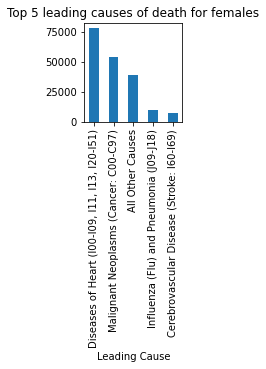

In [58]:
plt.subplot(2, 3, 2)
female_causes.plot(kind='bar')
plt.title('Top 5 leading causes of death for females')
plt.show()


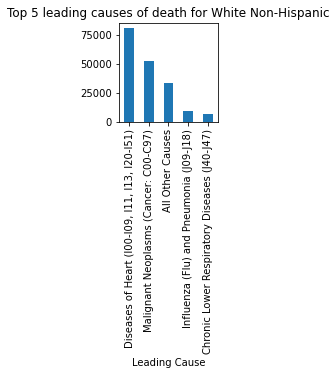

In [59]:
plt.subplot(2, 3, 3)
white_causes.plot(kind='bar')
plt.title('Top 5 leading causes of death for White Non-Hispanic')

plt.show()

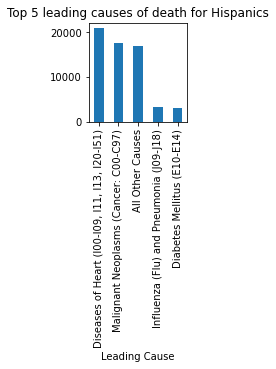

In [60]:
plt.subplot(2, 3, 4)
hispanic_causes.plot(kind='bar')
plt.title('Top 5 leading causes of death for Hispanics')

plt.show()

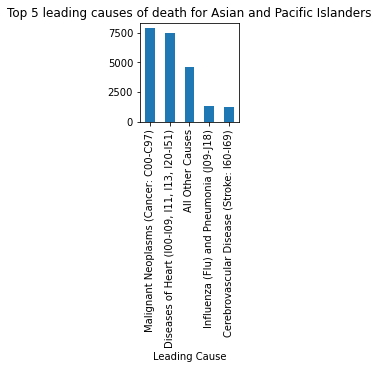

In [61]:
plt.subplot(2, 3, 5)
asian_causes.plot(kind='bar')
plt.title('Top 5 leading causes of death for Asian and Pacific Islanders')

plt.show()

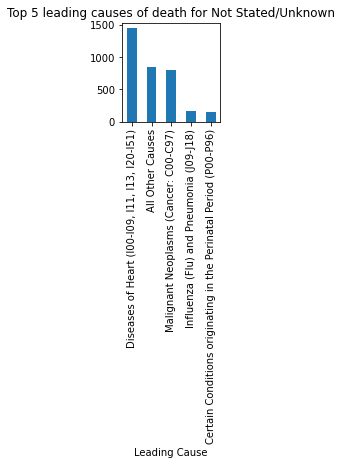

In [62]:
plt.subplot(2, 3, 6)
unknown_causes.plot(kind='bar')
plt.title('Top 5 leading causes of death for Not Stated/Unknown')
plt.show()

How have death rates changed over time for different causes of death and demographics? For example, have death rates for certain causes of death decreased over time, or have there been changes in death rates based on sex or race/ethnicity?

In [65]:
result = df.dtypes

In [66]:
result

Year                         int64
Leading Cause               object
Sex                         object
Race Ethnicity              object
Deaths                     float64
Death Rate                  object
Age Adjusted Death Rate     object
dtype: object

In [74]:


df['Death Rate'] = df['Death Rate'].str.replace('.', '0')

# Convert the column to a float column
df['Death Rate'] = df['Death Rate'].astype(float)

# Display the resulting DataFrame
print(df)



      Year                                      Leading Cause Sex  \
0     2011       Chronic Lower Respiratory Diseases (J40-J47)   M   
1     2008              Malignant Neoplasms (Cancer: C00-C97)   M   
2     2010     Chronic Liver Disease and Cirrhosis (K70, K73)   M   
3     2014              Malignant Neoplasms (Cancer: C00-C97)   M   
4     2014  Certain Conditions originating in the Perinata...   M   
...    ...                                                ...  ..   
1089  2011  Mental and Behavioral Disorders due to Acciden...   M   
1090  2013            Influenza (Flu) and Pneumonia (J09-J18)   M   
1091  2007                        Diabetes Mellitus (E10-E14)   F   
1092  2010   Insitu or Benign / Uncertain Neoplasms (D00-D48)   F   
1093  2012                        Diabetes Mellitus (E10-E14)   M   

             Race Ethnicity  Deaths  Death Rate Age Adjusted Death Rate  
0        White Non-Hispanic   444.0      3303.0                    27.8  
1        White Non-Hisp

C:\Users\Tipu Sultan\AppData\Local\Temp\ipykernel_16896\2649428198.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Death Rate'] = df['Death Rate'].str.replace('.', '0')


In [76]:

df['Age Adjusted Death Rate'] = df['Age Adjusted Death Rate'].str.replace('.', '0')

# Convert the column to a float column
df['Age Adjusted Death Rate'] = df['Age Adjusted Death Rate'].astype(float)

C:\Users\Tipu Sultan\AppData\Local\Temp\ipykernel_16896\2719063626.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Age Adjusted Death Rate'] = df['Age Adjusted Death Rate'].str.replace('.', '0')


In [77]:
df.head(10)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,Chronic Lower Respiratory Diseases (J40-J47),M,White Non-Hispanic,444.0,3303.0,2708.0
1,2008,Malignant Neoplasms (Cancer: C00-C97),M,White Non-Hispanic,3361.0,25004.0,21403.0
2,2010,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,150.0,1301.0,1706.0
3,2014,Malignant Neoplasms (Cancer: C00-C97),M,Hispanic,1146.0,96.0,14305.0
4,2014,Certain Conditions originating in the Perinata...,M,Not Stated/Unknown,25.0,0.0,0.0
5,2014,Influenza (Flu) and Pneumonia (J09-J18),F,Asian and Pacific Islander,80.0,1208.0,1401.0
6,2014,"Accidents Except Drug Posioning (V01-X39, X43,...",F,Asian and Pacific Islander,42.0,607.0,609.0
7,2013,"Accidents Except Drug Posioning (V01-X39, X43,...",M,Black Non-Hispanic,159.0,1805.0,1901.0
8,2011,Essential Hypertension and Renal Diseases (I10...,M,White Non-Hispanic,142.0,1006.0,808.0
9,2013,"Chronic Liver Disease and Cirrhosis (K70, K73)",M,Hispanic,149.0,1206.0,1507.0


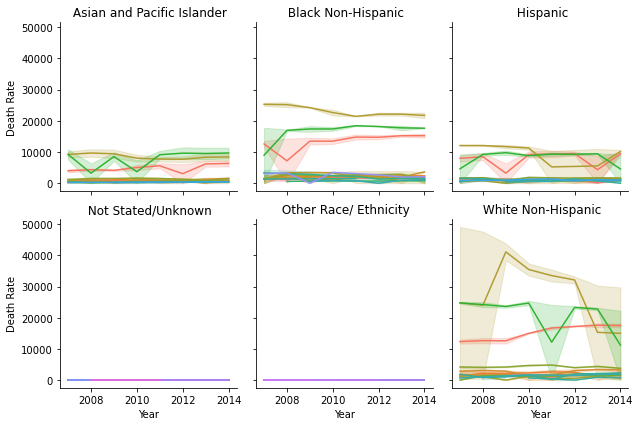

In [78]:


# Group the data by year, demographic, and cause of death, and calculate the average death rate
grouped = df.groupby(['Year', 'Sex', 'Race Ethnicity', 'Leading Cause'])['Death Rate'].mean().reset_index()

# Create a line chart for each demographic and cause of death
g = sns.FacetGrid(grouped, col='Race Ethnicity', hue='Leading Cause', col_wrap=3)
g.map(sns.lineplot, 'Year', 'Death Rate')

# Set the title for each plot based on demographic
for ax in g.axes.flat:
    ax.set_title(ax.get_title().split('=')[-1])

plt.show()

Are there any correlations or patterns in the data that could provide insight into potential risk factors for different causes of death? For example, are there certain demographic groups that are more likely to be affected by certain causes of death, or are there other factors (such as age or geographic location) that seem to be associated with higher death rates?

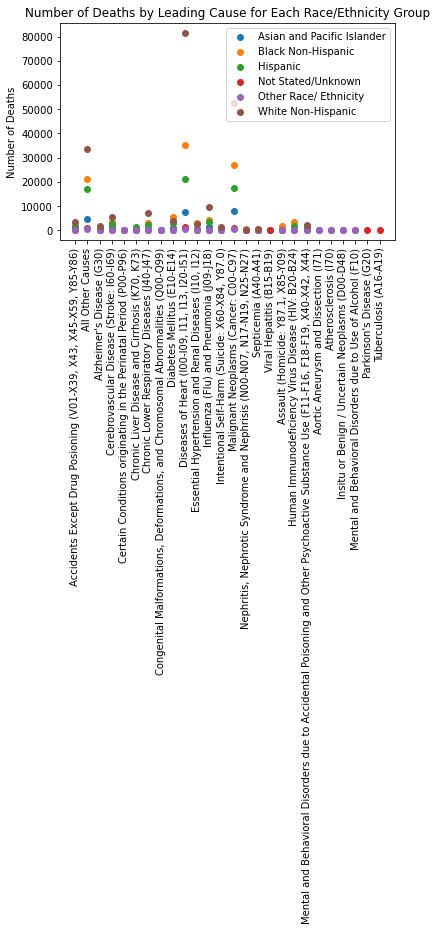

In [88]:
# Reshape data
df_scatter = df.groupby(['Race Ethnicity', 'Leading Cause'], as_index=False)['Deaths'].sum()

# Create scatter plot
fig, ax = plt.subplots()
for ethnicity in df_scatter['Race Ethnicity'].unique():
    df_ethnicity = df_scatter[df_scatter['Race Ethnicity'] == ethnicity]
    ax.scatter(df_ethnicity['Leading Cause'], df_ethnicity['Deaths'], label=ethnicity)
ax.legend()
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by Leading Cause for Each Race/Ethnicity Group')
plt.xticks(rotation=90)
plt.show()



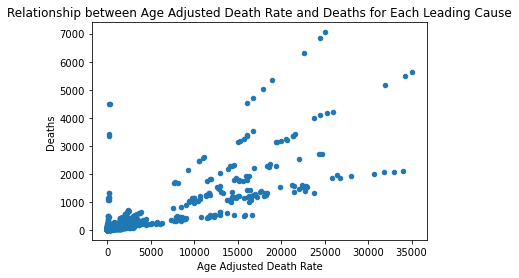

In [81]:
# Scatter plot: Relationship between age and death rate for each leading cause
df_scatter = df[['Leading Cause', 'Deaths', 'Age Adjusted Death Rate']]
ax = df_scatter.plot(kind='scatter', x='Age Adjusted Death Rate', y='Deaths')
plt.title('Relationship between Age Adjusted Death Rate and Deaths for Each Leading Cause')
plt.show()



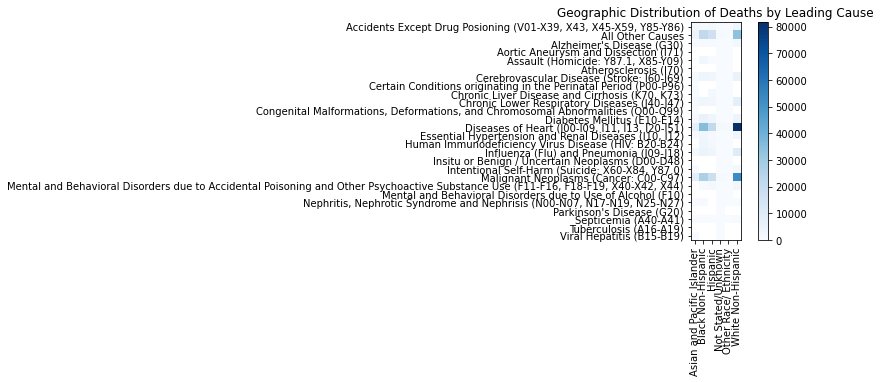

In [82]:
# Geographic heat map: Geographic distribution of deaths by leading cause
df_heat = df.pivot_table(index='Leading Cause', columns='Race Ethnicity', values='Deaths', aggfunc=sum)
ax = plt.imshow(df_heat, cmap='Blues', interpolation='nearest')
plt.xticks(range(len(df_heat.columns)), df_heat.columns, rotation=90)
plt.yticks(range(len(df_heat.index)), df_heat.index)
plt.colorbar()
plt.title('Geographic Distribution of Deaths by Leading Cause')
plt.show()



In [94]:
# extract text between parentheses and create new column
df['Leading Cause'] = df['Leading Cause'].str.extract('\((.*?)\)')

# print the updated dataframe
print(df)

      Year                   Leading Cause Sex         Race Ethnicity  Deaths  \
0     2011                         J40-J47   M     White Non-Hispanic   444.0   
1     2008                 Cancer: C00-C97   M     White Non-Hispanic  3361.0   
2     2010                        K70, K73   M               Hispanic   150.0   
3     2014                 Cancer: C00-C97   M               Hispanic  1146.0   
4     2014                         P00-P96   M     Not Stated/Unknown    25.0   
...    ...                             ...  ..                    ...     ...   
1089  2011  F11-F16, F18-F19, X40-X42, X44   M               Hispanic   145.0   
1090  2013                             Flu   M               Hispanic   233.0   
1091  2007                         E10-E14   F     White Non-Hispanic   231.0   
1092  2010                         D00-D48   F  Other Race/ Ethnicity     NaN   
1093  2012                         E10-E14   M     White Non-Hispanic   292.0   

      Death Rate  Age Adjus

In [95]:
df.head(10)

,Year,Leading Cause,Sex,Race Ethnicity,Deaths,Death Rate,Age Adjusted Death Rate
0,2011,J40-J47,M,White Non-Hispanic,444.0,3303.0,2708.0
1,2008,Cancer: C00-C97,M,White Non-Hispanic,3361.0,25004.0,21403.0
2,2010,"K70, K73",M,Hispanic,150.0,1301.0,1706.0
3,2014,Cancer: C00-C97,M,Hispanic,1146.0,96.0,14305.0
4,2014,P00-P96,M,Not Stated/Unknown,25.0,0.0,0.0
5,2014,Flu,F,Asian and Pacific Islander,80.0,1208.0,1401.0
6,2014,"V01-X39, X43, X45-X59, Y85-Y86",F,Asian and Pacific Islander,42.0,607.0,609.0
7,2013,"V01-X39, X43, X45-X59, Y85-Y86",M,Black Non-Hispanic,159.0,1805.0,1901.0
8,2011,"I10, I12",M,White Non-Hispanic,142.0,1006.0,808.0
9,2013,"K70, K73",M,Hispanic,149.0,1206.0,1507.0


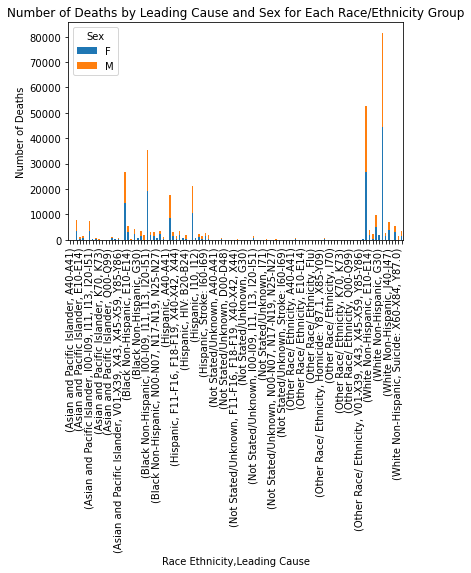

In [97]:
df_stacked = df.groupby(['Race Ethnicity', 'Leading Cause', 'Sex'])['Deaths'].sum().unstack()
ax = df_stacked.plot(kind='bar', stacked=True)
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by Leading Cause and Sex for Each Race/Ethnicity Group')

# get the x-tick labels
xticklabels = ax.get_xticklabels()

# set the tick labels for every n-th label
n = 3
for i, label in enumerate(xticklabels):
    if i % n != 0:
        label.set_visible(False)

plt.show()



how to know How do age-adjusted death rates compare to overall death rates for different demographics and causes of death? This could provide insight into whether certain groups are disproportionately affected by certain causes of death

C:\Users\Tipu Sultan\AppData\Local\Temp\ipykernel_16896\2074959978.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_plot.index, rotation=90)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\Tipu Sultan\AppData\Local\Temp\ipykernel_16896\2074959978.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_plot.index, rotation=90)


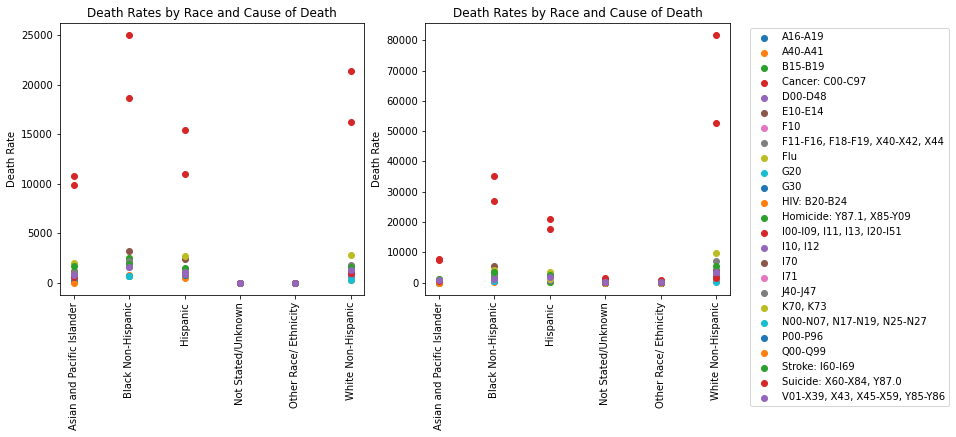

In [104]:
# Calculate age-adjusted death rates by race and cause of death
df_age_adjusted = df.groupby(['Race Ethnicity', 'Leading Cause'])['Age Adjusted Death Rate'].mean().unstack()

# Calculate overall death rates by race and cause of death
df_overall = df.groupby(['Race Ethnicity', 'Leading Cause'])['Deaths'].sum().unstack()

# Plot age-adjusted and overall death rates side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Create scatter plots for age-adjusted and overall death rates
for ax, df_plot in zip(axs, [df_age_adjusted, df_overall]):
    for i, group in enumerate(df_plot.columns):
        ax.scatter(x=df_plot.index, y=df_plot[group], label=group)
    ax.set_xticklabels(df_plot.index, rotation=90)
    ax.set_ylabel('Death Rate')
    ax.set_title('Death Rates by Race and Cause of Death')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()